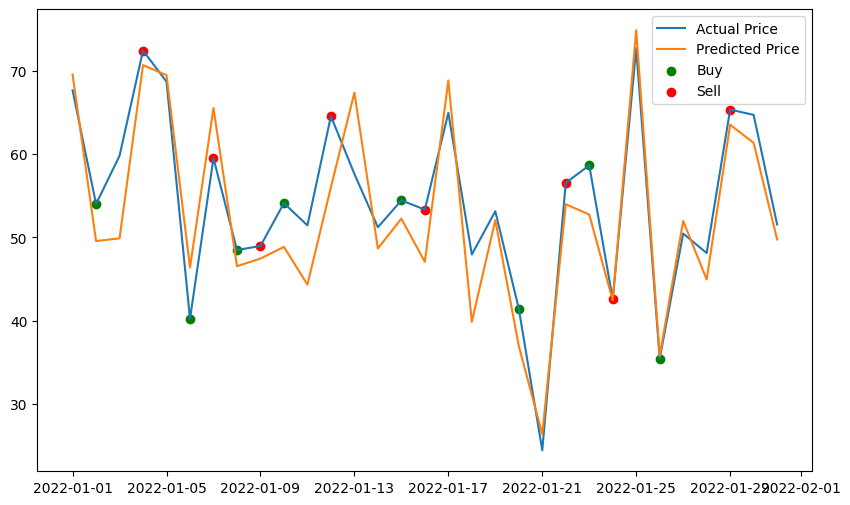

In [3]:
from trading_bot import TradingBot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

# Create a date range
date_range = pd.date_range(start='1/1/2022', end='1/31/2022', freq='D')

# Generate random values for actual and predicted prices
np.random.seed(0)
actual_prices = np.random.normal(50, 10, len(date_range))
predicted_prices = actual_prices + np.random.normal(0, 5, len(date_range))

# Create a DataFrame
df = pd.DataFrame({
    'date': date_range,
    'actual_price': actual_prices,
    'predicted_price': predicted_prices
})

# Initialize the TradingBot
bot = TradingBot()

# Decide when to buy and sell
for i in range(1, len(df) - 1):
    current_price = df.loc[i, 'actual_price']
    future_price = df.loc[i + 1, 'predicted_price']
    previous_price = df.loc[i - 1, 'actual_price']
    timestamp = df.loc[i, 'date']

    bot.decide_trade_trend(current_price, df.loc[i:i+2, 'predicted_price'].values, timestamp)

# Create a DataFrame for buy and sell points
buy_df = pd.DataFrame(bot.buy_points, columns=['date', 'price'])
buy_df['action'] = 'buy'
sell_df = pd.DataFrame(bot.sell_points, columns=['date', 'price'])
sell_df['action'] = 'sell'

# Concatenate the buy and sell DataFrames
trade_df = pd.concat([buy_df, sell_df])

# Merge with the original DataFrame
df = pd.merge(df, trade_df, how='left', on='date')

# Plot the actual price, predicted price, and buy/sell points
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['actual_price'], label='Actual Price')
plt.plot(df['date'], df['predicted_price'], label='Predicted Price')
plt.scatter(df[df['action'] == 'buy']['date'], df[df['action'] == 'buy']['price'], color='green', label='Buy')
plt.scatter(df[df['action'] == 'sell']['date'], df[df['action'] == 'sell']['price'], color='red', label='Sell')
plt.legend()
plt.show()